In [1]:
import pandas as pd
%pylab inline
%load_ext autoreload
%autoreload 2
#%matplotlib nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

from UKMovementSensing import hsmm

In [3]:
datadir = "/media/sf_VBox_Shared/London/accelerometer_5second/merged/"
path_to_file5sec = os.path.join(datadir, "__016563_2014-08-08 12-02-19.bin_day1.csv")

In [4]:
filenames = os.listdir(datadir)
datasets = [pd.read_csv(os.path.join(datadir,fn)) for fn in filenames]
print(len(datasets))

21


In [5]:
for i in range(len(datasets)):
    datasets[i] = datasets[i].set_index('timestamp')
    datasets[i].index = pd.to_datetime(datasets[i].index) 
    datasets[i]['Activity'] = [str(a) for a in datasets[i]['Activity']]

In [6]:
example_index = 2
day1_5sec = datasets[example_index]

print(min(day1_5sec.index))
print(max(day1_5sec.index))

2014-08-02 04:00:00
2014-08-03 03:59:55


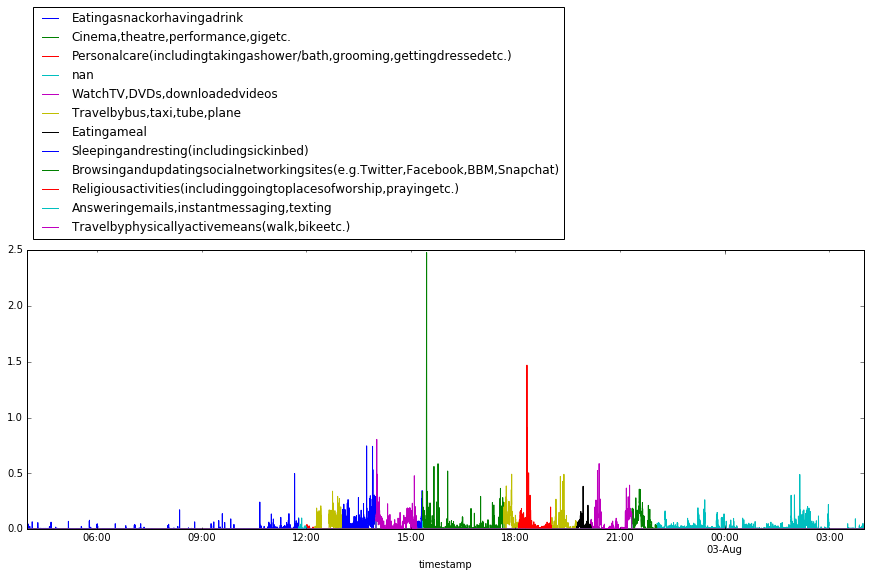

In [101]:
#byAct = day1_5sec.groupby('Activity')
activities = set(day1_5sec['Activity'])
fig, ax = plt.subplots(figsize=(15,5))
for act in activities:
    dfa = day1_5sec.copy()
    dfa[dfa['Activity']!=act] = 0
    dfa['acceleration'].plot(label=act)
legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3);

In [102]:
X_list = [np.column_stack([d.anglex, d.angley, d.anglez, d.acceleration]) for d in datasets] #, day1_5sec.acceleration])
column_names = ['anglex', 'angley', 'anglez', 'acceleration']
print(column_names)

['anglex', 'angley', 'anglez', 'acceleration']


In [103]:
X = X_list[example_index]
print(X.shape)

(17280, 4)


## Create and train the model

In [104]:
Nmax = 10
dim = X.shape[1]

0
Resampled 21 sequences in 120.0 seconds
('Log likelihood: ', -4634249.6150983609)
1
Resampled 21 sequences in 114.4 seconds
('Log likelihood: ', -4123695.8919886905)
2
Resampled 21 sequences in 110.8 seconds
('Log likelihood: ', -4015410.6614281991)
3
Resampled 21 sequences in 107.9 seconds
('Log likelihood: ', -3944828.444467607)
4
Resampled 21 sequences in 107.8 seconds
('Log likelihood: ', -3881993.1192143098)
5
Resampled 21 sequences in 108.1 seconds
('Log likelihood: ', -3840044.6935805776)
6
Resampled 21 sequences in 107.4 seconds
('Log likelihood: ', -3808825.1572305546)
7
Resampled 21 sequences in 106.5 seconds
('Log likelihood: ', -3780427.6794131449)
8
Resampled 21 sequences in 106.1 seconds
('Log likelihood: ', -3754641.8878304888)
9
Resampled 21 sequences in 110.1 seconds
('Log likelihood: ', -3732223.4241272202)
10
Resampled 21 sequences in 105.8 seconds
('Log likelihood: ', -3711683.8933040011)
11
Resampled 21 sequences in 105.0 seconds
('Log likelihood: ', -3692782.029

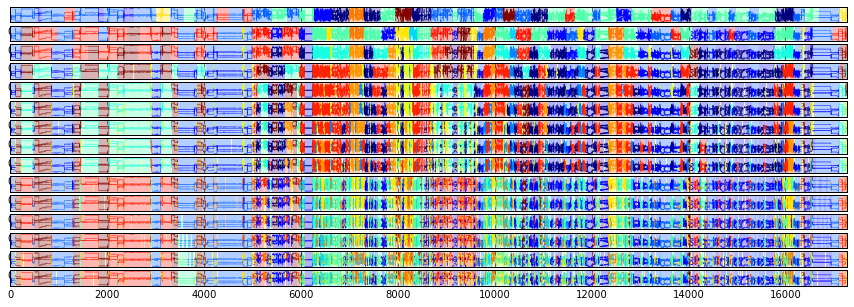

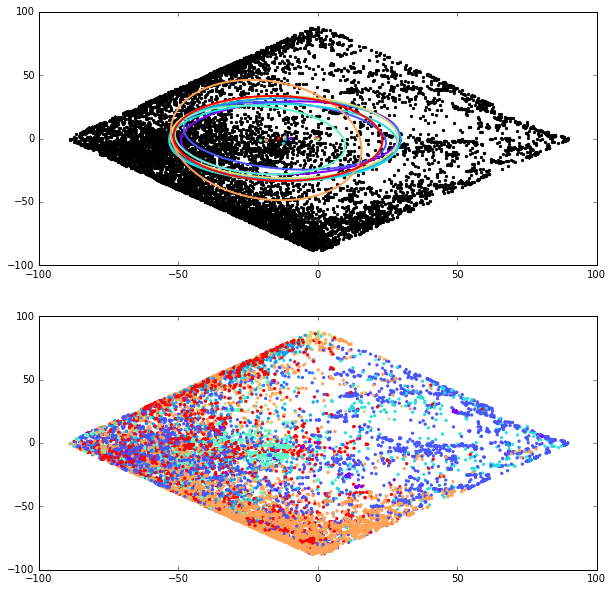

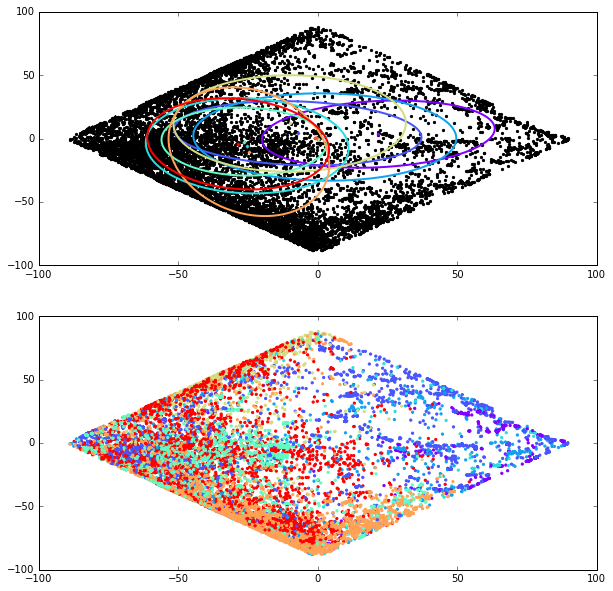

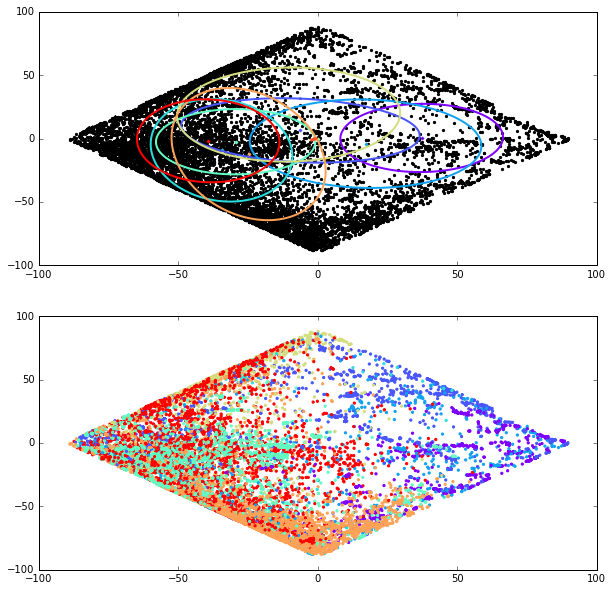

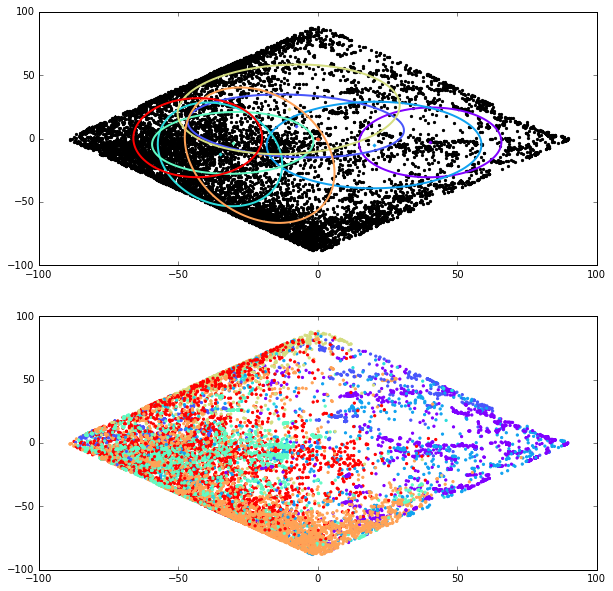

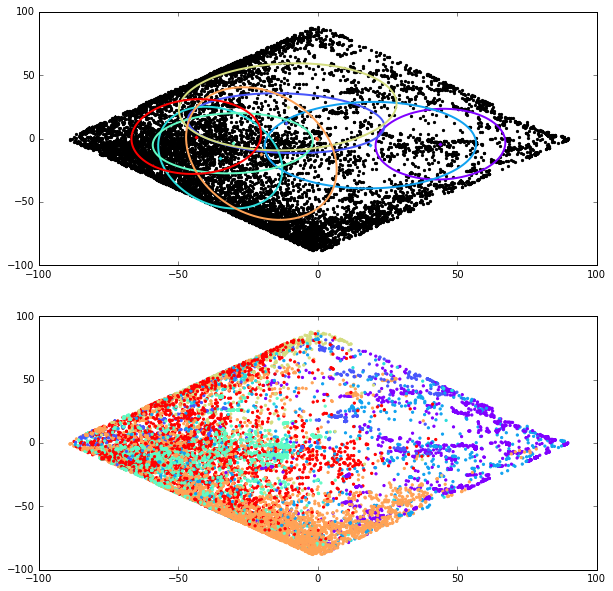

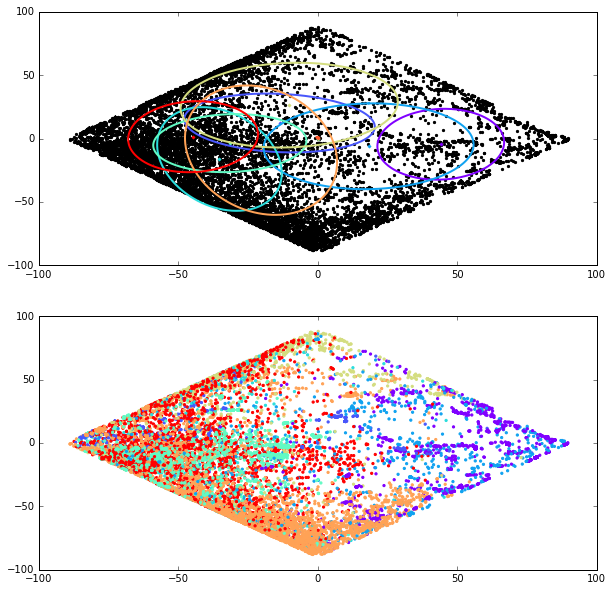

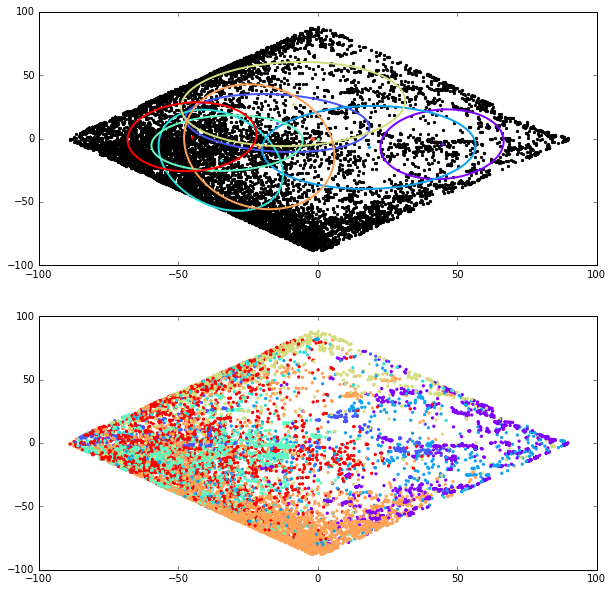

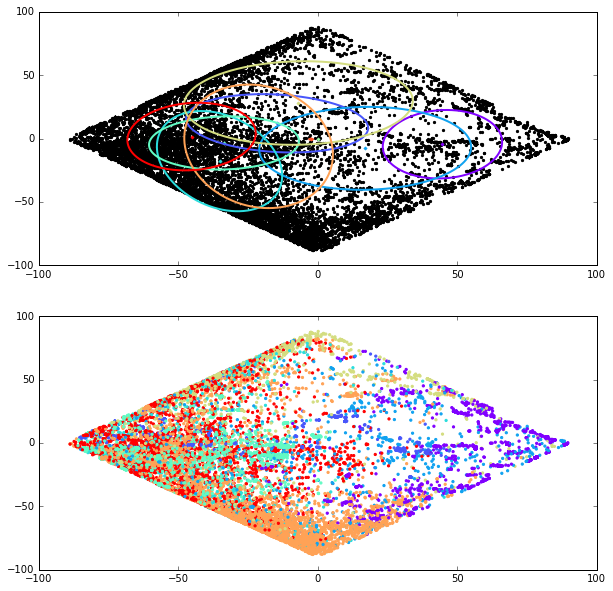

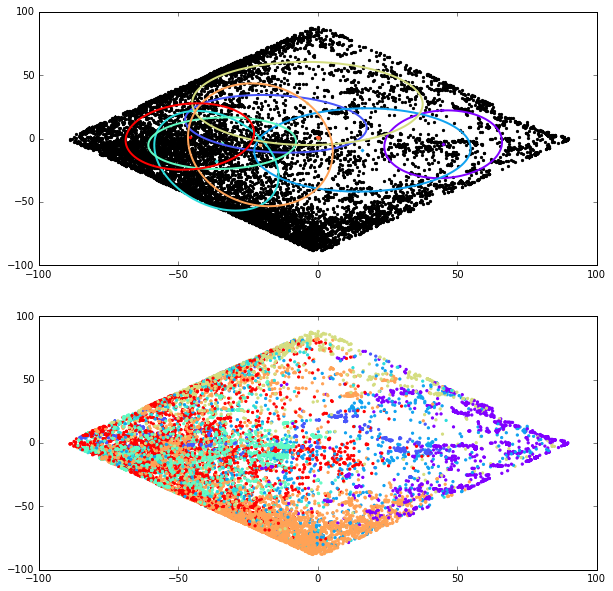

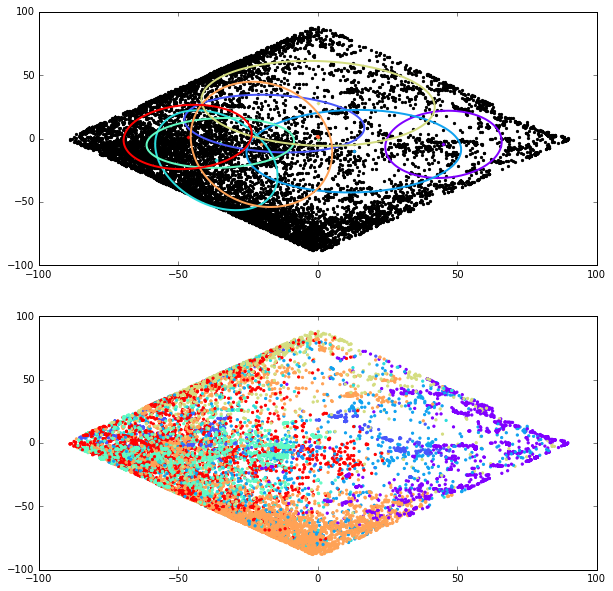

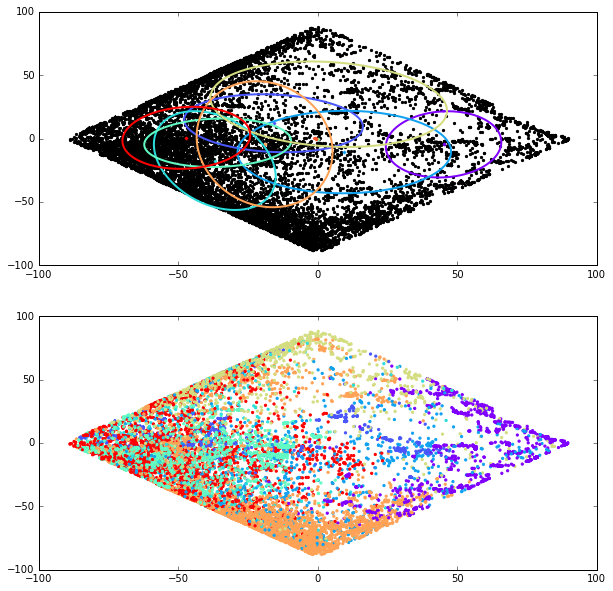

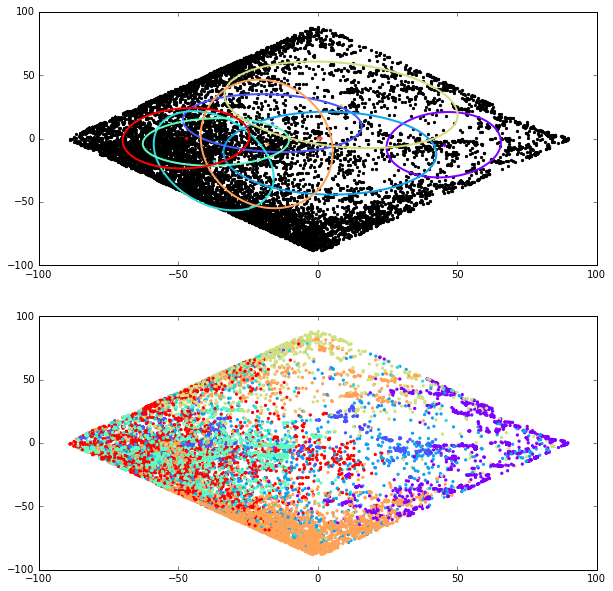

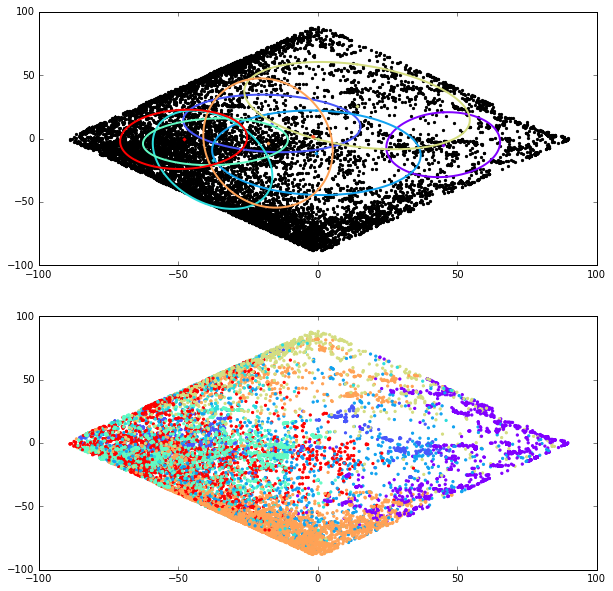

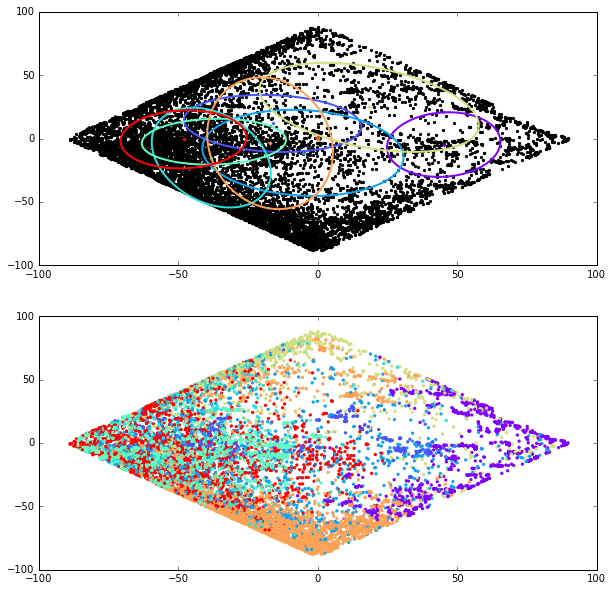

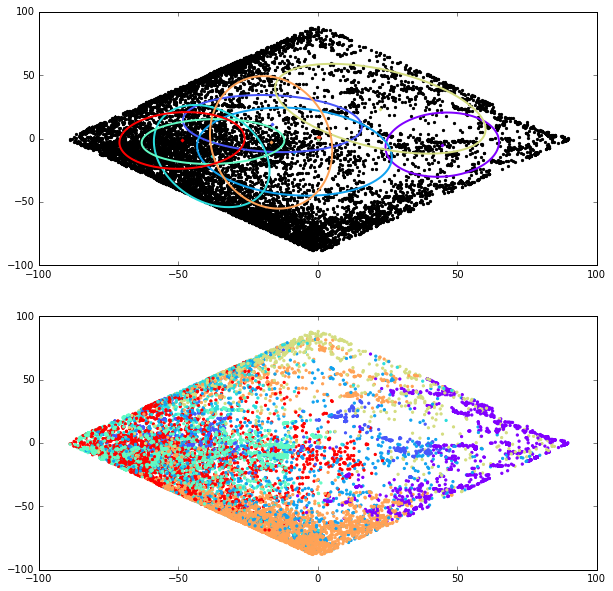

In [105]:
model, model_dist = hsmm.train_hsmm(X_list, Nmax=Nmax, nr_resamples=15, trunc=600, visualize=True, example_index=example_index)

In [106]:
d_old = model_dist[0]
for j, d in enumerate(model_dist):
    #print d[0].mu
    diff = np.array([np.sqrt(np.sum(np.square(d[i].mu - d_old[i].mu))) for i in range(len(d))])
    print(j, np.mean(diff))
    d_old = d

(0, 0.0)
(1, 12.221657138311773)
(2, 8.2824464796529167)
(3, 4.221184899126416)
(4, 2.6357650833296322)
(5, 1.7050700899380178)
(6, 1.6637747891281798)
(7, 1.1956508685234888)
(8, 1.4930356250431573)
(9, 1.2826022602342972)
(10, 1.4092735116652906)
(11, 1.6270940598937162)
(12, 1.935791777057609)
(13, 1.7155547589644651)
(14, 1.3776195343651998)


In [107]:
import pickle
#TODO: the model object also contains the data so this is not very efficient
with open(os.path.join(datadir, 'models/model_{}states.pkl'.format(Nmax)), 'wb') as f:
    pickle.dump(model, file=f)

In [108]:
data = day1_5sec
hidden_states = model.stateseqs[example_index]

In [109]:
colormap, cmap = hsmm.get_color_map(Nmax)

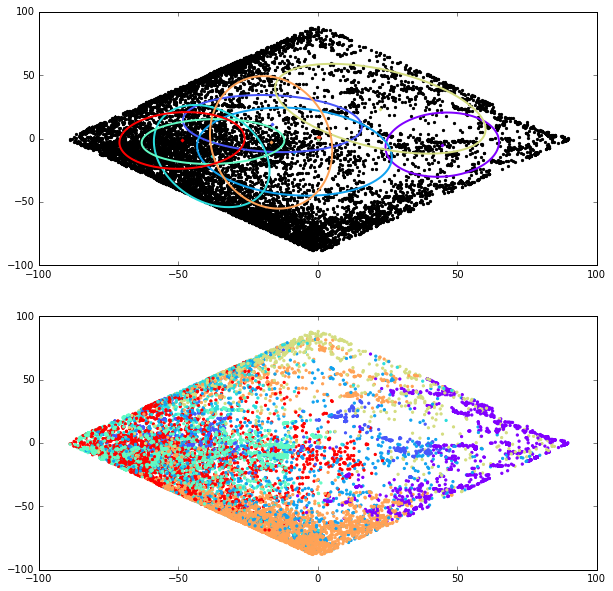

In [110]:
hsmm.plot_observations(X, 0, 1, model, hidden_states, Nmax)

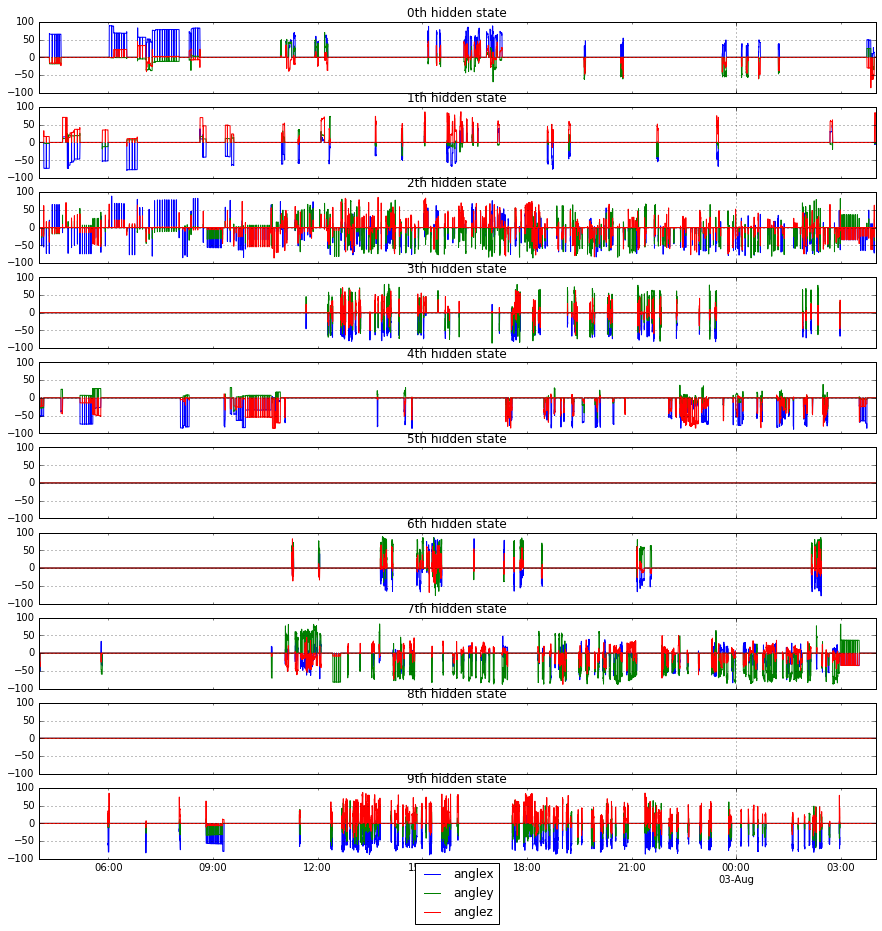

In [111]:
hsmm.plot_perstate(data[['anglex', 'angley', 'anglez']], hidden_states)

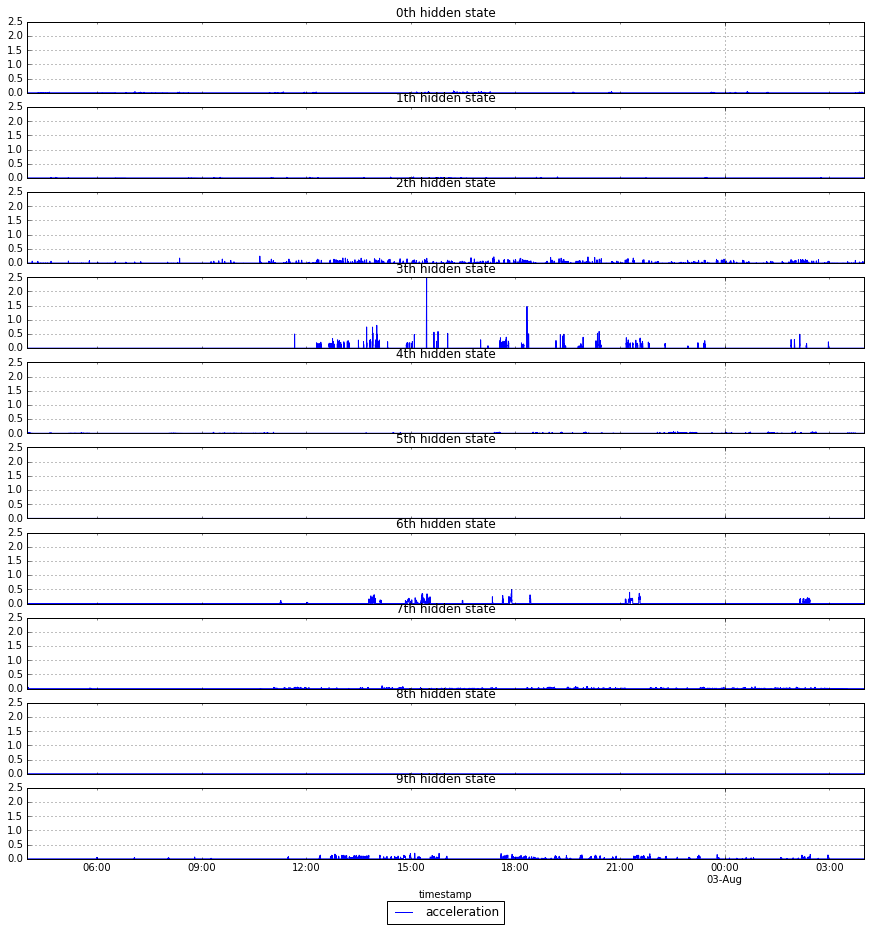

In [112]:
hsmm.plot_perstate(data[['acceleration']], hidden_states)

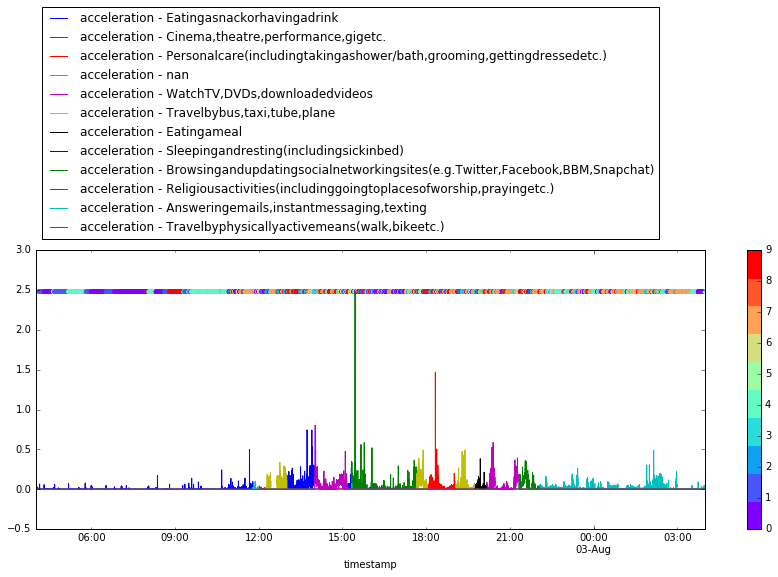

In [113]:
hsmm.plot_states_and_var(data, hidden_states, columns=['acceleration'], by='Activity')

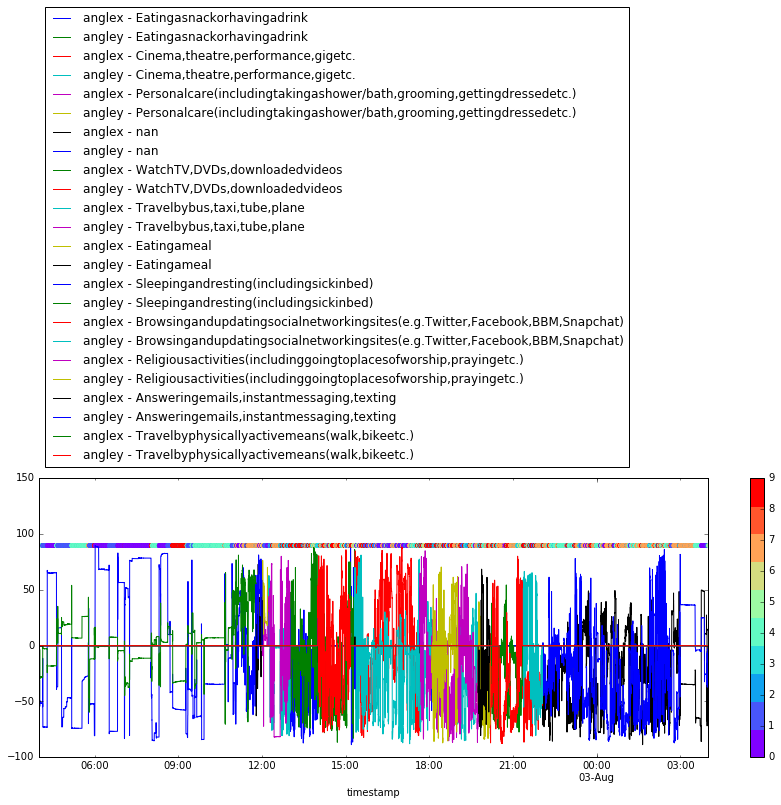

In [114]:
hsmm.plot_states_and_var(data, hidden_states, columns=['anglex', 'angley'], by='Activity')

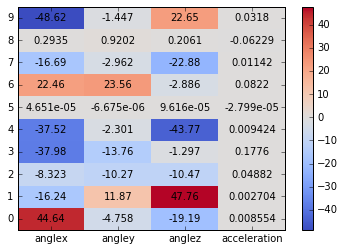

In [188]:
#Plot the means
plotdata = np.array([d.mu for d in model.obs_distns])

hsmm.plot_heatmap(plotdata, horizontal_labels=column_names)

In [195]:
pd.DataFrame(plotdata.transpose(), index=column_names)

0          1          2          3          4         5  \
anglex        44.636850 -16.241589  -8.322864 -37.984582 -37.517650  0.000047   
angley        -4.758325  11.868966 -10.268001 -13.760413  -2.301235 -0.000007   
anglez       -19.193783  47.759108 -10.466606  -1.297244 -43.766064  0.000096   
acceleration   0.008554   0.002704   0.048823   0.177582   0.009424 -0.000028   

                      6          7         8          9  
anglex        22.456509 -16.693548  0.293464 -48.619965  
angley        23.557354  -2.961621  0.920250  -1.446924  
anglez        -2.886400 -22.879271  0.206058  22.649021  
acceleration   0.082202   0.011420 -0.062295   0.031796

In [116]:
#Plot the mean of the acceleration
#plotdata2 = plotdata[:,3][:,np.newaxis]
#hsmm.plot_heatmap(plotdata2, column_names)

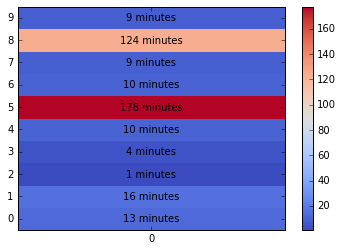

In [117]:
# Plot expected duration
plotdata = np.array([d.lmbda/3. for d in model.dur_distns])[:,np.newaxis]
#grouplabels = ["{:.3} minutes".format(x/3.) for x in plotdata[:,0]]
hsmm.plot_heatmap(plotdata, form='{:.0f} minutes')

Plot the covariance matrix for each state

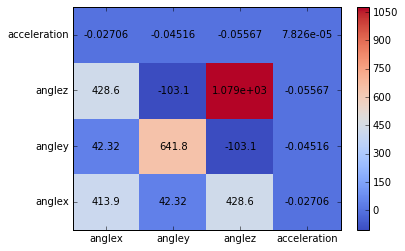

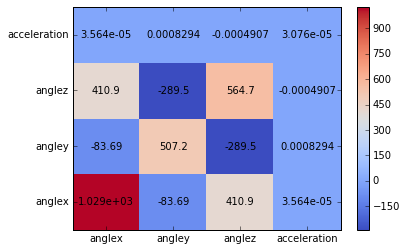

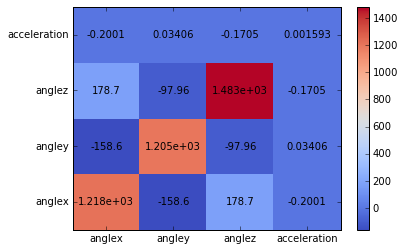

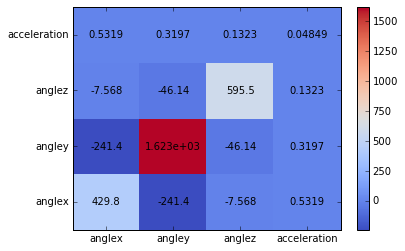

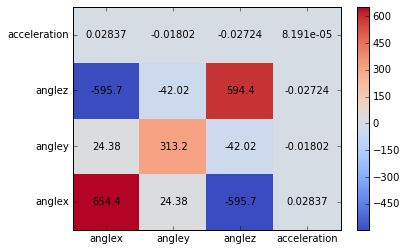

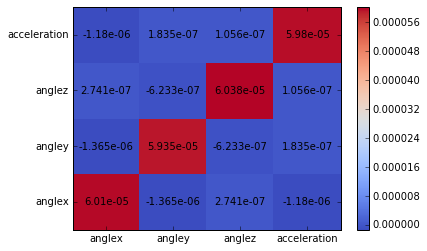

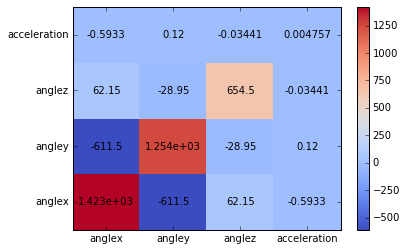

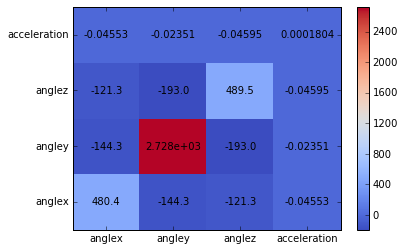

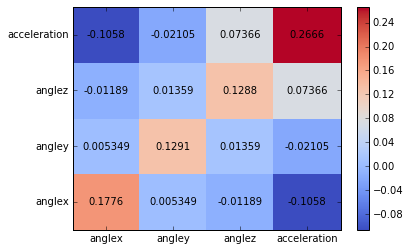

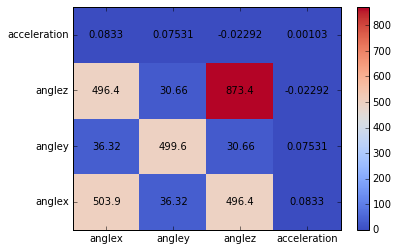

In [118]:
#fig, axs = plt.subplots(nrows=model.num_states, ncols=1,  figsize = (10, 15))
for i in range(model.num_states):
    plotdata = model.obs_distns[i].sigma
    #plt.sca(axs[i])
    hsmm.plot_heatmap(plotdata, horizontal_labels=column_names, vertical_labels=column_names)
#colorbar()
show()

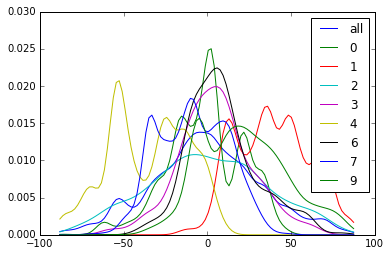

In [186]:
from scipy.stats.kde import gaussian_kde

variable = "anglez"#"acceleration"

fig, ax = subplots()
#day1_5sec.hist(variable, bins=100)
vals = data[variable]
kde = gaussian_kde(vals)
d = np.linspace(min(vals), max(vals), 100)
p = plot(d, kde(d), label="all")

for i in range(model.num_states):
    mask = hidden_states == i
    if(sum(mask)>0 and np.std(vals[mask])>0):
        kde = gaussian_kde(vals[mask])
        plot(d, kde(d), label=str(i))
#ax.set_xlim(0,0.1)
legend()
show()

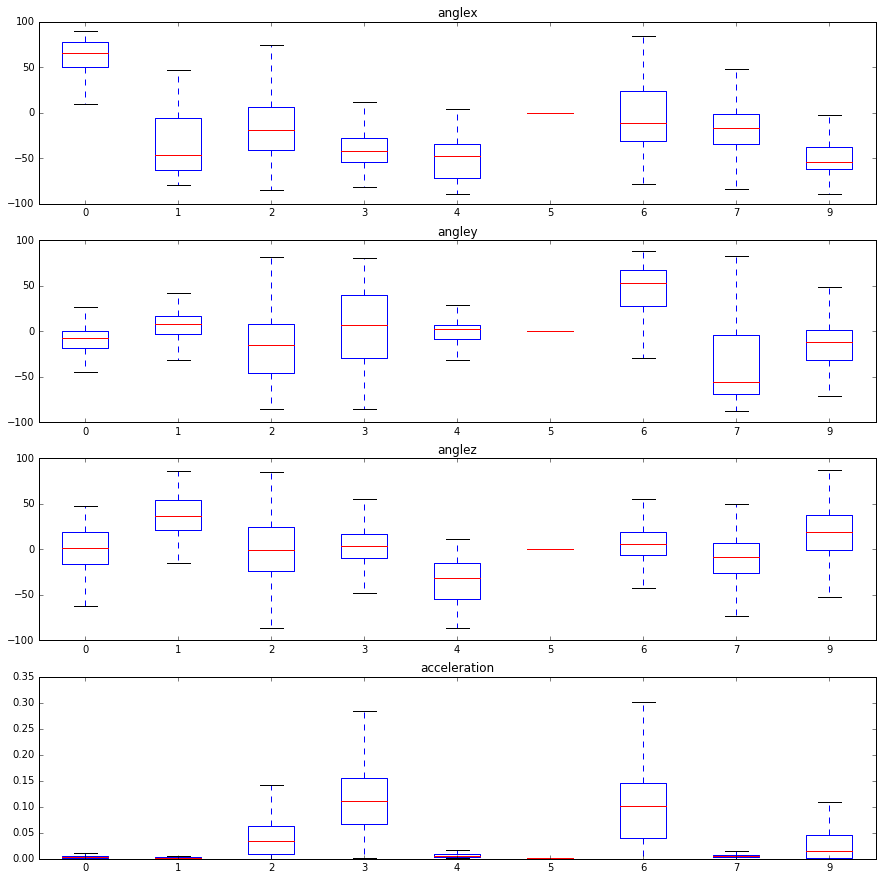

In [123]:
hsmm.plot_boxplots(data[column_names], hidden_states)

In [124]:
def getDurations(hidden_states, nr_states):
    durations = {i: [] for i in range(nr_states)}
    prev = hidden_states[0]
    d = 0
    for x in hidden_states:
        if x == prev:
            d += 1
        else:
            durations[prev].append(d)
            prev = x
            d = 0
    return durations

In [125]:
durations = getDurations(hidden_states, Nmax)
for i, d in durations.iteritems():
    if len(d)>0:
        datdur = np.mean(d)
        distdur = model.dur_distns[i].lmbda
        print('{}\t{:.1f}\t{:.1f}'.format(i, datdur, distdur))
    else:
        print(i)

0	38.0	39.6
1	38.9	48.4
2	2.5	3.3
3	8.6	12.1
4	28.5	30.3
5
6	22.8	30.8
7	25.4	26.4
8
9	19.2	25.8


In [126]:
all_hidden_states = np.array([s for m in model.stateseqs for s in m])
all_activities = np.array([s for d in datasets for s in list(np.array(d['Activity']))])
print(all_hidden_states.shape)
print(all_activities.shape)

(362872,)
(362872,)


In [136]:
ctab = pd.crosstab(all_activities, all_hidden_states, margins=True).sort_values('All', ascending=False)

In [150]:
ctab

col_0                                                   0      1      2  \
row_0                                                                     
All                                                 55135  51440  32119   
nan                                                 18129  19656   9889   
Sleepingandresting(includingsickinbed)              21177  19205   3388   
Generalinternetbrowsing,programming(nottimeonso...   1019   3172   2479   
Speaking,socialisingface-to-face                     2216   1152   2236   
Eatingameal                                           430   2082   1404   
WatchTV,DVDs,downloadedvideos                        1683    689   1460   
Personalcare(includingtakingashower/bath,groomi...    729    867   1469   
PlayingelectronicgamesandApps                        4838    493   1152   
Travelbyphysicallyactivemeans(walk,bikeetc.)         1866    746    895   
Travelbycar,van(includingvehiclesownedbyfriends...     96     58   1535   
Answeringemails,instantmessaging,texting              396    544   1098   
Didnothing,justrelaxing,bored,waiting                 480     89   1447   
Otherexerciseandsports,dancing,keepingfit,skiin...      0   1261    555   
Listeningtomusic,radio,iPod,otheraudiocontent         270     80    936   
Cinema,theatre,performance,gigetc.                   1391    257    476   
Eatingasnackorhavingadrink                            153     17    257   
Travelbybus,taxi,tube,plane                            66    100    370   
Browsingandupdatingsocialnetworkingsites(e.g.Tw...    133    406    112   
Shopping(includingwindowshopping,hangingoutatsh...     63      0    374   
Reading(notforschool)                                   0    358    127   
Hobbies,artsandcrafts,musicalactivities,writing...      0     47     95   
Religiousactivities(includinggoingtoplacesofwor...      0    128    128   
Fixingthingsaroundthehouse,fixingbike,gardening         0      0    124   
Jogging,running,walking,hiking                          0      0     27   
Unpaidworkforfamilyorothernon-householdmembers(...      0      0     22   
Cooking,cleaning,andshoppingforthehousehold             0     33     49   
Petcare                                                 0      0     15   

col_0                                                   3      4      5  \
row_0                                                                     
All                                                 27579  56047  16717   
nan                                                  6832  20732   9171   
Sleepingandresting(includingsickinbed)                617  19314   7008   
Generalinternetbrowsing,programming(nottimeonso...   1801   4607      0   
Speaking,socialisingface-to-face                     1434   2396      0   
Eatingameal                                          1580    691      0   
WatchTV,DVDs,downloadedvideos                        1383   3193      0   
Personalcare(includingtakingashower/bath,groomi...   1633    753      0   
PlayingelectronicgamesandApps                         113    621    538   
Travelbyphysicallyactivemeans(walk,bikeetc.)          700    292      0   
Travelbycar,van(includingvehiclesownedbyfriends...   3110    421      0   
Answeringemails,instantmessaging,texting             1337    126      0   
Didnothing,justrelaxing,bored,waiting                1563    985      0   
Otherexerciseandsports,dancing,keepingfit,skiin...   1607    145      0   
Listeningtomusic,radio,iPod,otheraudiocontent        1674    465      0   
Cinema,theatre,performance,gigetc.                     91    107      0   
Eatingasnackorhavingadrink                            267     12      0   
Travelbybus,taxi,tube,plane                           399    152      0   
Browsingandupdatingsocialnetworkingsites(e.g.Tw...    158    173      0   
Shopping(includingwindowshopping,hangingoutatsh...    206    111      0   
Reading(notforschool)                                  76    120      0   
Hobbies,artsandcrafts,mu

In [172]:
ind = list(ctab.index)
pd.crosstab(all_activities, all_hidden_states, normalize='index', margins=True).loc[ind]

col_0                                                      0         1  \
row_0                                                                    
All                                                 0.151941  0.141758   
nan                                                 0.148242  0.160729   
Sleepingandresting(includingsickinbed)              0.263163  0.238657   
Generalinternetbrowsing,programming(nottimeonso...  0.043958  0.136836   
Speaking,socialisingface-to-face                    0.122033  0.063440   
Eatingameal                                         0.029657  0.143596   
WatchTV,DVDs,downloadedvideos                       0.124197  0.050845   
Personalcare(includingtakingashower/bath,groomi...  0.061415  0.073041   
PlayingelectronicgamesandApps                       0.429015  0.043717   
Travelbyphysicallyactivemeans(walk,bikeetc.)        0.178838  0.071497   
Travelbycar,van(includingvehiclesownedbyfriends...  0.009303  0.005621   
Answeringemails,instantmessaging,texting            0.044444  0.061055   
Didnothing,justrelaxing,bored,waiting               0.061554  0.011413   
Otherexerciseandsports,dancing,keepingfit,skiin...  0.000000  0.223582   
Listeningtomusic,radio,iPod,otheraudiocontent       0.049162  0.014567   
Cinema,theatre,performance,gigetc.                  0.362428  0.066962   
Eatingasnackorhavingadrink                          0.053892  0.005988   
Travelbybus,taxi,tube,plane                         0.025771  0.039047   
Browsingandupdatingsocialnetworkingsites(e.g.Tw...  0.069488  0.212121   
Shopping(includingwindowshopping,hangingoutatsh...  0.034351  0.000000   
Reading(notforschool)                               0.000000  0.240753   
Hobbies,artsandcrafts,musicalactivities,writing...  0.000000  0.036661   
Religiousactivities(includinggoingtoplacesofwor...  0.000000  0.100787   
Fixingthingsaroundthehouse,fixingbike,gardening     0.000000  0.000000   
Jogging,running,walking,hiking                      0.000000  0.000000   
Unpaidworkforfamilyorothernon-householdmembers(...  0.000000  0.000000   
Cooking,cleaning,andshoppingforthehousehold         0.000000  0.110368   
Petcare                                             0.000000  0.000000   

col_0                                                      2         3  \
row_0                                                                    
All                                                 0.088513  0.076002   
nan                                                 0.080863  0.055866   
Sleepingandresting(includingsickinbed)              0.042102  0.007667   
Generalinternetbrowsing,programming(nottimeonso...  0.106941  0.077693   
Speaking,socialisingface-to-face                    0.123135  0.078969   
Eatingameal                                         0.096834  0.108973   
WatchTV,DVDs,downloadedvideos                       0.107741  0.102059   
Personalcare(includingtakingashower/bath,groomi...  0.123757  0.137574   
PlayingelectronicgamesandApps                       0.102155  0.010020   
Travelbyphysicallyactivemeans(walk,bikeetc.)        0.085777  0.067088   
Travelbycar,van(includingvehiclesownedbyfriends...  0.148755  0.301386   
Answeringemails,instantmessaging,texting            0.123232  0.150056   
Didnothing,justrelaxing,bored,waiting               0.185560  0.200436   
Otherexerciseandsports,dancing,keepingfit,skiin...  0.098404  0.284929   
Listeningtomusic,radio,iPod,otheraudiocontent       0.170430  0.304807   
Cinema,theatre,performance,gigetc.                  0.124023  0.023710   
Eatingasnackorhavingadrink                          0.090525  0.094047   
Travelbybus,taxi,tube,plane                         0.144475  0.155799   
Browsingandupdatingsocialnetworkingsites(e.g.Tw...  0.058516  0.082550   
Shopping(includingwindowshopping,hangingoutatsh...  0.203926  0.112323   
Reading(notforschool)                               0.085407  0.051110   
Hobbies,artsandcrafts,musicalactivities,writing...  0.074103  0.075663   
Rel

In [183]:
mask_notnan = np.array(all_activities) != 'nan'
print(mask_notnan.shape)
print()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [185]:
mask_notnan = np.array(all_activities) != 'nan'
all_activities_sub = np.array(all_activities)[mask_notnan]
all_hidden_states_sub = np.array(all_hidden_states)[mask_notnan]
ind = list(ctab.index[2:])
pd.crosstab(all_activities_sub, all_hidden_states_sub, normalize='columns', margins=True).loc[ind]

col_0                                                      0         1  \
row_0                                                                    
Sleepingandresting(includingsickinbed)              0.572259  0.604235   
Generalinternetbrowsing,programming(nottimeonso...  0.027536  0.099799   
Speaking,socialisingface-to-face                    0.059882  0.036245   
Eatingameal                                         0.011620  0.065505   
WatchTV,DVDs,downloadedvideos                       0.045479  0.021678   
Personalcare(includingtakingashower/bath,groomi...  0.019700  0.027278   
PlayingelectronicgamesandApps                       0.130736  0.015511   
Travelbyphysicallyactivemeans(walk,bikeetc.)        0.050424  0.023471   
Travelbycar,van(includingvehiclesownedbyfriends...  0.002594  0.001825   
Answeringemails,instantmessaging,texting            0.010701  0.017116   
Didnothing,justrelaxing,bored,waiting               0.012971  0.002800   
Otherexerciseandsports,dancing,keepingfit,skiin...  0.000000  0.039674   
Listeningtomusic,radio,iPod,otheraudiocontent       0.007296  0.002517   
Cinema,theatre,performance,gigetc.                  0.037588  0.008086   
Eatingasnackorhavingadrink                          0.004134  0.000535   
Travelbybus,taxi,tube,plane                         0.001783  0.003146   
Browsingandupdatingsocialnetworkingsites(e.g.Tw...  0.003594  0.012774   
Shopping(includingwindowshopping,hangingoutatsh...  0.001702  0.000000   
Reading(notforschool)                               0.000000  0.011264   
Hobbies,artsandcrafts,musicalactivities,writing...  0.000000  0.001479   
Religiousactivities(includinggoingtoplacesofwor...  0.000000  0.004027   
Fixingthingsaroundthehouse,fixingbike,gardening     0.000000  0.000000   
Jogging,running,walking,hiking                      0.000000  0.000000   
Unpaidworkforfamilyorothernon-householdmembers(...  0.000000  0.000000   
Cooking,cleaning,andshoppingforthehousehold         0.000000  0.001038   
Petcare                                             0.000000  0.000000   

col_0                                                      2         3  \
row_0                                                                    
Sleepingandresting(includingsickinbed)              0.152407  0.029739   
Generalinternetbrowsing,programming(nottimeonso...  0.111516  0.086808   
Speaking,socialisingface-to-face                    0.100585  0.069118   
Eatingameal                                         0.063158  0.076156   
WatchTV,DVDs,downloadedvideos                       0.065677  0.066660   
Personalcare(includingtakingashower/bath,groomi...  0.066082  0.078710   
PlayingelectronicgamesandApps                       0.051822  0.005447   
Travelbyphysicallyactivemeans(walk,bikeetc.)        0.040261  0.033740   
Travelbycar,van(includingvehiclesownedbyfriends...  0.069051  0.149901   
Answeringemails,instantmessaging,texting            0.049393  0.064443   
Didnothing,justrelaxing,bored,waiting               0.065092  0.075336   
Otherexerciseandsports,dancing,keepingfit,skiin...  0.024966  0.077457   
Listeningtomusic,radio,iPod,otheraudiocontent       0.042105  0.080686   
Cinema,theatre,performance,gigetc.                  0.021413  0.004386   
Eatingasnackorhavingadrink                          0.011561  0.012869   
Travelbybus,taxi,tube,plane                         0.016644  0.019232   
Browsingandupdatingsocialnetworkingsites(e.g.Tw...  0.005038  0.007616   
Shopping(includingwindowshopping,hangingoutatsh...  0.016824  0.009929   
Reading(notforschool)                               0.005713  0.003663   
Hobbies,artsandcrafts,musicalactivities,writing...  0.004274  0.004675   
Religiousactivities(includinggoingtoplacesofwor...  0.005758  0.003229   
Fixingthingsaroundthehouse,fixingbike,gardening     0.005578  0.012002   
Jogging,running,walking,hiking                      0.001215  0.007423   
Unpaidworkforfamilyorothernon-householdmembers(...  0.000990  0.013351   
Coo

In [167]:
all_acceleration = np.array([s for d in datasets for s in list(np.array(d['acceleration']))])
df_as = pd.DataFrame({'acc': all_acceleration, 'state': all_hidden_states})
df_as.groupby('state').mean().transpose()

state         0        1         2         3         4             5  \
acc    0.008411  0.00271  0.048657  0.178786  0.009589  3.299215e-07   

state         6         7         9  
acc    0.079489  0.010771  0.031227

In [168]:
df_as.groupby('state').std().transpose()

state         0         1         2         3         4         5         6  \
acc    0.007454  0.003333  0.038754  0.216865  0.008015  0.000032  0.066786   

state         7         9  
acc    0.011488  0.031094

In [169]:
print([d.lmbda*5.0/60 for d in model.dur_distns])

[3.3021569037264595, 4.033718067501055, 0.27571913329809294, 1.0096055633209065, 2.5219249231128855, 44.37531631550306, 2.5684759815307023, 2.203699584888632, 30.949812048794094, 2.150809313109269]


In [170]:
len(model.dur_distns)

10